In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from scipy.optimize import curve_fit

In [2]:
DUNEblue = '#7FAED5'
DUNElightOrange = '#F19E54'
DUNEdarkOrange = '#F0652B'
DUNEgreen = '#8ACA6F'
DUNEgray = '#626466'
DUNEyellow = '#FBD03F'
DUNEpurple = '#5B3069'
DUNElightPurple = '#8C6E96'
DUNEcyan = '#42C2A8'
DUNEpink = '#F7AEC2'

DUNEcolors = [DUNEblue,
              DUNElightOrange,
              DUNEdarkOrange,
              DUNEgreen,
              DUNEgray,
              DUNEyellow,
              DUNEpurple,
              DUNElightPurple,
              DUNEcyan,
              DUNEpink]

matplotlib.rc('font', family = 'FreeSerif', size = 16, weight = 'bold')
matplotlib.rc('text', usetex = True)
matplotlib.rc('axes', prop_cycle = matplotlib.cycler(color = DUNEcolors))
matplotlib.rc('figure', figsize = (6.0, 4.8))

def quadr_sum(*args):
    return np.sqrt(sum(np.power(args, 2)))

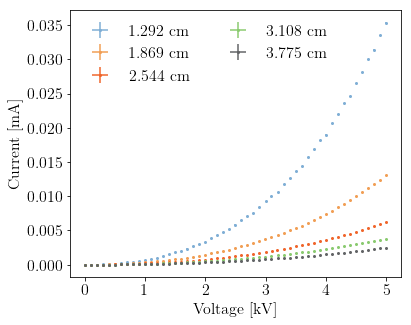

In [9]:
### MSU TLM Plot 1: voltage vs. current

data = [{"file": "MSU_TLM_data/TLM_length/sample2.dat",
         "label": r'1.292 cm'},
        {"file": "MSU_TLM_data/TLM_length/sample4.dat",
         "label": r'1.869 cm'},
        {"file": "MSU_TLM_data/TLM_length/sample1.dat",
         "label": r'2.544 cm'},
        {"file": "MSU_TLM_data/TLM_length/sample5.dat",
         "label": r'3.108 cm'},
        {"file": "MSU_TLM_data/TLM_length/sample3.dat",
         "label": r'3.775 cm'},]

fig = plt.figure()
ax = fig.gca()

for item in data:
    V, dV, I, dI = np.loadtxt(item["file"], 
                              delimiter = ',', 
                              skiprows = 1).T
    
    V /= 1000 # voltage in kV
    dV /= 1000
    
    I /= 1000 # current in mA
    dI /= 1000
    
    ax.errorbar(V, I,
                xerr = dV,
                yerr = dI,
                ls = "none",
                fmt = 'o',
                ms = 2,
                label = item["label"])
    
ax.legend(ncol = 2, frameon = False)
ax.set_xlabel(r'Voltage [kV]')
ax.set_ylabel(r'Current [mA]')

plt.tight_layout()

plt.savefig('TLM_length_current.png', dpi = 300)

1.292 cm [0.63414064 3.74621533 1.46975437] [[ 0.00260325 -0.01213655  0.00099812]
 [-0.01213655  0.05698615 -0.0046013 ]
 [ 0.00099812 -0.0046013   0.00038997]]
1.869 cm [1.01045298 3.50187989 1.49316266] [[ 0.00324712 -0.00843425  0.0009278 ]
 [-0.00843425  0.02206238 -0.00238366]
 [ 0.0009278  -0.00238366  0.00026989]]
2.544 cm [1.39494536 3.39743899 1.50352235] [[ 0.0041819  -0.00748071  0.00094126]
 [-0.00748071  0.01344845 -0.00167006]
 [ 0.00094126 -0.00167006  0.00021483]]
3.108 cm [1.72040248 3.42004416 1.51463472] [[ 0.00643487 -0.00909953  0.00124779]
 [-0.00909953  0.01291204 -0.00175458]
 [ 0.00124779 -0.00175458  0.00024427]]
3.775 cm [2.63322079 2.84447077 1.60762247] [[ 0.02626541 -0.02118378  0.00365457]
 [-0.02118378  0.01715873 -0.00292603]
 [ 0.00365457 -0.00292603  0.00051501]]


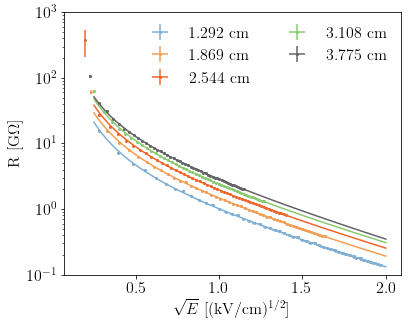

In [10]:
### MSU TLM Plot 2: sqrt(E) vs. resistance

def R_model(E, R0, E0, a):
    return R0*np.exp(np.sqrt(E0/E) - a*E)

def dR_model(E, R0, E0, a, pcov):
    grad = np.array([R_model(E, R0, E0, a)/R0, # dR/dR0
                     R_model(E, R0, E0, a)/(2*np.sqrt(E*E0)), # dR/dE0
                     R_model(E, R0, E0, a)*E # dR/da
                    ])
    return np.sqrt(np.dot(grad, np.dot(pcov, grad)))

starting_values = (1, 1, 1)
optBounds = ([1e-5, 1e-1, 1e-3],[1e1, 50, 1e3])

#def R_model(E, R0, E0, a):
#    return R0*np.exp(np.power(E0/E, a))

#starting_values = (0.01, 20, 0.5)
#optBounds = ([1e-5, 1e-1, 1e-1],[1e1, 50, 1e0])

#def R_model(E, R0, E0):
#    return R0*np.exp(-np.sqrt(E/E0))

#starting_values = (1, 1e-2)
#optBounds = ([1e-5, 1e-3],[1e4, 5e-1])

#def R_model(E, R0, E0):
#    return R0*np.exp(np.sqrt(E0/E))

#starting_values = (1, 1)
#optBounds = ([1e-5, 1e-1],[1e1, 5e2])


data = [{"file": "MSU_TLM_data/TLM_length/sample2.dat",
         "length": 1.292,
         "label": r'1.292 cm',
         "color": DUNEblue},
        {"file": "MSU_TLM_data/TLM_length/sample4.dat",
         "length": 1.869,
         "label": r'1.869 cm',
         "color": DUNElightOrange},
        {"file": "MSU_TLM_data/TLM_length/sample1.dat",
         "length": 2.544,
         "label": r'2.544 cm',
         "color": DUNEdarkOrange},
        {"file": "MSU_TLM_data/TLM_length/sample5.dat",
         "length": 3.108,
         "label": r'3.108 cm',
         "color": DUNEgreen},
        {"file": "MSU_TLM_data/TLM_length/sample3.dat",
         "length": 3.775,
         "label": r'3.775 cm',
         "color": DUNEgray},]

dL = 0.025

fig = plt.figure()
ax = fig.gca()

for item in data:
    V, dV, I, dI = np.loadtxt(item["file"], 
                              delimiter = ',', 
                              skiprows = 2).T
    
    V /= 1000 # voltage in kV
    dV /= 1000
    
    I /= 1000 # current in mA
    dI /= 1000
    
    L = item["length"]
    
    E = V/item["length"]
    dE = E*quadr_sum(dV/V, dL/L)
    
    sqrtE = np.sqrt(E)
    dSqrtE = sqrtE*quadr_sum(0.5*dV/V, 0.5*dL/L)
    
    R = V/I # resistance in MOhm
    dR = R*quadr_sum(dV/V, dI/I)
    
    R *= 1.e-3 # resistance in GOhm
    dR *= 1.e-3
    
    ax.errorbar(sqrtE, R,
                xerr = dSqrtE,
                yerr = dR,
                ls = "none",
                fmt = 'o',
                ms = 2,
                label = item["label"],
                color = item["color"])
    
    #print (starting_values)
    #print (R_model(sqrtE, *starting_values))
    popt, pcov = curve_fit(R_model, 
                           sqrtE[1:], R[1:], 
                           sigma= dR[1:],
                           #absolute_sigma = True,
                           p0 = starting_values,
                           bounds = optBounds)
    
    #print (item["label"])
    #print (popt, pcov)
    if np.any(pcov[np.isfinite(pcov)]):
        print(item["label"], popt, pcov)
        fineSqrtE = np.linspace(0.25, 2, 1000)
        plt.plot(fineSqrtE, 
                 R_model(fineSqrtE, *popt),
                 color = item["color"])
        item["popt"] = popt
        item["pcov"] = pcov
    
ax.legend(ncol = 2, frameon = False)
ax.set_xlabel(r'$\sqrt{E}$ [(kV/cm)$^{1/2}$]')
ax.set_ylabel(r'R [G$\Omega$]')

#plt.plot(fineSqrtE, R_model(fineSqrtE, *starting_values))

ax.set_ylim(1e-1 ,1e3)

plt.semilogy() 
plt.tight_layout()

plt.savefig('TLM_length_resistance.png', dpi = 300)

1.292 2.241106000940671 0.05083706511404482
1.869 3.2542879115304126 0.07022699829093981
2.544 4.313147735763356 0.0850110030383838
3.108 5.316384554412293 0.11374557107213608
3.775 6.278375351205934 0.19949299768597412
[1.66240578 0.10741413] [[ 0.00073695 -0.00138959]
 [-0.00138959  0.00297658]]
contact resistance at 500 V/cm =  0.10741413226095098 +/- 0.05455801115575564


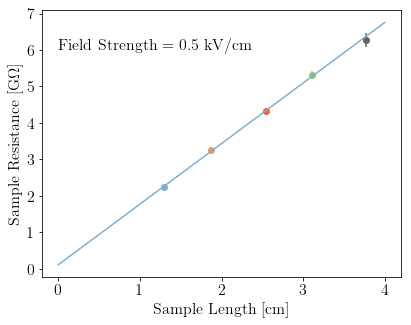

In [11]:
def TLM_model(L, m, b):
    return m*L + b

starting_values = (4, 0)
optBounds = ([0, -10], [20, 10])

testField = np.sqrt(0.5)

lengths = []
Rs = []
dRs = []

for item in data:
    L = item["length"]
    R = R_model(testField, *item["popt"])
    lengths.append(L)
    Rs.append(R)
    dR = dR_model(testField, *item["popt"], item["pcov"])
    dRs.append(dR)
    print (L, R, dR)
    plt.errorbar(L, R,
                 xerr = dL,
                 yerr = dR,
                 color = item["color"])
    plt.scatter(L, R, color = item["color"])

popt, pcov = curve_fit(TLM_model, 
                       lengths, Rs,
                       sigma = dRs,
                       #absolute_sigma = True,
                       p0 = starting_values,
                       bounds = optBounds)
print (popt, pcov)
print ("contact resistance at 500 V/cm = ", popt[1], "+/-", np.sqrt(pcov[1][1]))

fineLspace = np.linspace(0, 4, 1000)
plt.plot(fineLspace, TLM_model(fineLspace, *popt))

plt.text(0, 6, 'Field Strength = '+str(round(testField**2, 2))+' kV/cm')
plt.xlabel(r'Sample Length [cm]')
plt.ylabel(r'Sample Resistance [G$\Omega$]')

plt.tight_layout()

plt.savefig('TLM_length_TLMfit.png', dpi = 300)

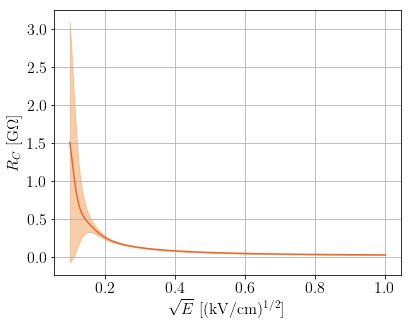

In [12]:
#testFields = np.linspace(0.25, 1.25, 500)
testFields = np.linspace(0.1, 1, 500)
Rcs = []
dRcs = []

for testField in testFields:
    lengths = []
    Rs = []
    dRs = []

    for item in data:
        L = item["length"]
        #R = R_model(testField, *item["popt"])
        R = R_model(np.sqrt(testField), *item["popt"])
        lengths.append(L)
        Rs.append(R)
        #dR = dR_model(testField, *item["popt"], item["pcov"])
        dR = dR_model(np.sqrt(testField), *item["popt"], item["pcov"])
        dRs.append(dR)
    
    popt, pcov = curve_fit(TLM_model, 
                           lengths, Rs,
                           sigma = dRs,
                           #absolute_sigma = True,
                           p0 = starting_values,
                           bounds = optBounds)
    Rcs.append(0.5*popt[1])
    dRcs.append(0.5*pcov[1][1])
    
print (zip(Rcs, dRcs))
    
lower_bound = [R - dR for R, dR in zip(Rcs, dRcs)]
upper_bound = [R + dR for R, dR in zip(Rcs, dRcs)]
    
plt.plot(testFields, Rcs, color = DUNEdarkOrange)
plt.fill_between(testFields, lower_bound, upper_bound, alpha = 0.5, color = DUNElightOrange)

#plt.semilogy()
plt.grid()

plt.xlabel(r'$\sqrt{E}$ [(kV/cm)$^{1/2}$]')
plt.ylabel(r'$R_C$ [G$\Omega$]')

plt.tight_layout()

plt.savefig('TLM_length_contactRes.png', dpi = 300)

2.582 cm [4.94002056 2.41722277 1.53457302] [[ 0.67658206 -0.28813193  0.04345015]
 [-0.28813193  0.12327009 -0.01836123]
 [ 0.04345015 -0.01836123  0.00282754]]
1.904 cm [4.40112507 2.65673211 1.49368837] [[ 0.41714688 -0.21051327  0.02964707]
 [-0.21051327  0.10664026 -0.01486631]
 [ 0.02964707 -0.01486631  0.0021301 ]]
1.263 cm [3.60494448 3.13283449 1.4325305 ] [[ 0.16284229 -0.10889264  0.0141382 ]
 [-0.10889264  0.07307937 -0.00939705]
 [ 0.0141382  -0.00939705  0.00124037]]
0.628 cm [3.82787928 2.98325481 1.45049594] [[ 0.21182493 -0.12971145  0.01741637]
 [-0.12971145  0.079716   -0.01060107]
 [ 0.01741637 -0.01060107  0.00144672]]
0.301 cm [5.12557875 2.32824927 1.54240679] [[ 0.71314572 -0.28843969  0.04367811]
 [-0.28843969  0.11704927 -0.01756844]
 [ 0.04367811 -0.01756844  0.00270081]]
0.100 cm [3.67160614 3.0527092  1.43226059] [[ 0.17579347 -0.11535856  0.01469806]
 [-0.11535856  0.07597369 -0.00958473]
 [ 0.01469806 -0.00958473  0.0012426 ]]
0.064 cm [6.55001157 1.84367

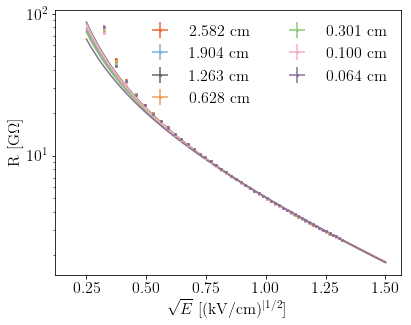

In [13]:
### MSU TLM Plot 2: sqrt(E) vs. resistance

def R_model(E, R0, E0, a):
    return R0*np.exp(np.sqrt(E0/E) - a*E)

def dR_model(E, R0, E0, a, pcov):
    grad = np.array([R_model(E, R0, E0, a)/R0, # dR/dR0
                     R_model(E, R0, E0, a)/(2*np.sqrt(E*E0)), # dR/dE0
                     R_model(E, R0, E0, a)*E # dR/da
                    ])
    return np.dot(grad, np.dot(pcov, grad))

starting_values = (1.5, 3.5, 1.5)
optBounds = ([1e-5, 1e-1, 1e-3],[1e2, 50, 1e3])

#def R_model(E, R0, E0, a):
#    return R0*np.exp(np.power(E0/E, a))

#starting_values = (0.01, 20, 0.5)
#optBounds = ([1e-5, 1e-1, 1e-1],[1e1, 50, 1e0])

#def R_model(E, R0, E0):
#    return R0*np.exp(-np.sqrt(E/E0 + a))

#starting_values = (1, 1e-2, 1e-2)
#optBounds = ([1e-5, 1e-3, 1e-3],[1e4, 5e-1, 1e0])

#def R_model(E, R0, E0):
#    return R0*np.exp(np.sqrt(E0/E))

#starting_values = (1, 1)
#optBounds = ([1e-5, 1e-1],[1e1, 5e2])


data = [{"file": "MSU_TLM_data/TLM_contact/sample1.dat",
         "contwid": 2.582,
         "length": 2.865,
         "label": r'2.582 cm',
         "color": DUNEdarkOrange},
        {"file": "MSU_TLM_data/TLM_contact/sample2.dat",
         "contwid": 1.904,
         "length": 2.865,
         "label": r'1.904 cm',
         "color": DUNEblue},
        {"file": "MSU_TLM_data/TLM_contact/sample3.dat",
         "contwid": 1.263,
         "length": 2.865,
         "label": r'1.263 cm',
         "color": DUNEgray},
        {"file": "MSU_TLM_data/TLM_contact/sample4.dat",
         "contwid": 0.628,
         "length": 2.865,
         "label": r'0.628 cm',
         "color": DUNElightOrange},
        {"file": "MSU_TLM_data/TLM_contact/sample5.dat",
         "contwid": 0.301,
         "length": 2.865,
         "label": r'0.301 cm',
         "color": DUNEgreen},
        {"file": "MSU_TLM_data/TLM_contact/sample6.dat",
         "contwid": 0.100,
         "length": 2.865,
         "label": r'0.100 cm',
         "color": DUNEpink},
        {"file": "MSU_TLM_data/TLM_contact/sample7.dat",
         "contwid": 0.064,
         "length": 2.865,
         "label": r'0.064 cm',
         "color": DUNElightPurple},
        ]

dL = 0.025
dW = 0.025

fig = plt.figure()
ax = fig.gca()

for item in data:
    if 'cut' in item:
        V, dV, I, dI = np.loadtxt(item["file"], 
                              delimiter = ',', 
                              skiprows = 2)[item["cut"]:].T
    else:
        V, dV, I, dI = np.loadtxt(item["file"], 
                              delimiter = ',', 
                              skiprows = 2).T
    
    V /= 1000 # voltage in kV
    dV /= 1000
    
    I /= 1000 # current in mA
    dI /= 1000
    
    L = item["length"]
    
    E = V/item["length"]
    dE = E*quadr_sum(dV/V, dL/L)
    
    sqrtE = np.sqrt(E)
    dSqrtE = sqrtE*quadr_sum(0.5*dV/V, 0.5*dL/L)
    
    R = V/I # resistance in MOhm
    dR = R*quadr_sum(dV/V, dI/I)
    
    R *= 1.e-3 # resistance in GOhm
    dR *= 1.e-3
    
    ax.errorbar(sqrtE, R,
                xerr = dSqrtE,
                yerr = dR,
                ls = "none",
                fmt = 'o',
                ms = 2,
                label = item["label"],
                color = item["color"])
    
    #print (starting_values)
    #print (R_model(sqrtE, *starting_values))
    popt, pcov = curve_fit(R_model, 
                           sqrtE[1:], R[1:], 
                           sigma= dR[1:],
                           #absolute_sigma = True,
                           p0 = starting_values,
                           bounds = optBounds)
    
    #print (item["label"])
    #print (popt, pcov)
    if np.any(pcov[np.isfinite(pcov)]):
        print(item["label"], popt, pcov)
        fineSqrtE = np.linspace(0.25, 1.5, 1000)
        plt.plot(fineSqrtE, 
                 R_model(fineSqrtE, *popt),
                 color = item["color"])
        item["popt"] = popt
        item["pcov"] = pcov
    
ax.legend(ncol = 2, frameon = False)
ax.set_xlabel(r'$\sqrt{E}$ [(kV/cm)$^{|1/2}$]')
ax.set_ylabel(r'R [G$\Omega$]')

#plt.plot(fineSqrtE, R_model(fineSqrtE, *starting_values))

#ax.set_ylim(1e-1 ,1e3)

plt.semilogy()  

plt.tight_layout()

plt.savefig('TLM_contact_resistance.png', dpi = 300)

[10.6736047] [[0.00055267]]


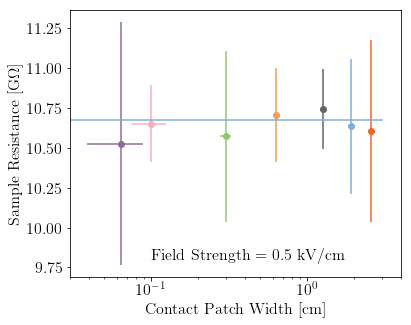

In [14]:
#def TLM_model(L, m, b):
#    return m/L + b

#starting_values = (4, 0)
#optBounds = ([0, -10], [20, 20])

@np.vectorize
def TLM_model(L, b):
    return b

starting_values = (2)
optBounds = ([0], [100])

testField = np.sqrt(0.5)

widths = []
Rs = []
dRs = []

for item in data:
    W = item["contwid"]
    R = R_model(testField, *item["popt"])
    widths.append(W)
    Rs.append(R)
    dR = dR_model(testField, *item["popt"], item["pcov"])
    dRs.append(dR)
    plt.errorbar(W, R,
                 xerr = dW,
                 yerr = dR,
                 color = item["color"])
    plt.scatter(W, R, color = item["color"])
    
popt, pcov = curve_fit(TLM_model, 
                       widths, Rs,
                       sigma = dRs,
                       p0 = starting_values,
                       bounds = optBounds)
print (popt, pcov)

fineLspace = np.linspace(0, 3, 1000)
plt.plot(fineLspace, TLM_model(fineLspace, *popt))

plt.text(1.e-1, 9.8, 'Field Strength = '+str(round(testField**2, 2))+' kV/cm')
#plt.text(1.e-1, 2.2, 'Field Strength = '+str(round(testField**2, 2))+' kV/cm')
plt.xlabel(r'Contact Patch Width [cm]')
plt.ylabel(r'Sample Resistance [G$\Omega$]')

#plt.ylim(5, 8)
plt.semilogx()
plt.xlim(3e-2, 4e0)

plt.tight_layout()

plt.savefig('TLM_contact_fit.png', dpi = 300)